# Tutorial 03 in class exercises (randomization and bootstrapping)
## Goals
* Practice working through coding basics on your own
* Get a better intuition about when standard parametric t-tests and non-parametric approaches produce similar results and when they can diverge
* See the importance of plotting your data before you do anything else!
* Apply bootstrapping to some real EEG data to estimate confidence intervals

## First start by importing the packages you'll need. 
* Numpy, scipy, and matplotlib
* maybe set up a standard font as well if you want to get fancy

In [1]:
import numpy as np
from scipy import stats  
import matplotlib.pyplot as plt

# also define the default font we'll use for figures. 
fig_font = {'fontname':'Arial', 'size':'20'}

## Part I: Start with some data.
* First plot it
* Then compute summary stats (mean, std) for each data array
* Then compute the correlation coeffecient that relates the two arrays
* Then the t-value and p-value associated with the correlation. 
* Try to do this without copying from the in-class tutorial! Google the formulas if you don't remember them and then try to translate them into python (you can peek at in class tutorial if you get stuck, but its good practice to just hack it out)

[source of this famous data set: Anscombe](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

In [2]:
d1 = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
d2 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

## Plot data...scatter works well here
* First rule of data analysis...always plot your data first!

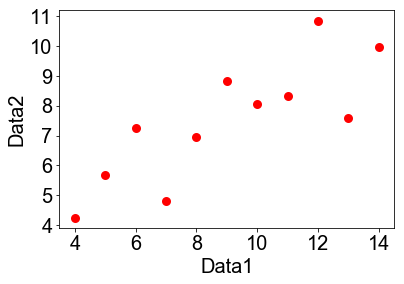

In [4]:
plt.scatter(d1,d2,color='r',marker='o',linewidths=3)
plt.xlabel('Data1', **fig_font)
plt.ylabel('Data2', **fig_font)
plt.xticks(**fig_font)
plt.yticks(**fig_font)
plt.show()

## Compute mean, std of both data arrays
* Leave the output in the notebook so that we can come back and compare later

In [5]:
#Calculate mean, std for the data 1
mean_data_1 = np.mean(d1, axis=0)
std_data_1 = np.std(d1, axis=0)
print('mean of data 1: ', mean_data_1, ' std of data 1: ', std_data_1)

#Calculate mean, std for the data 1
mean_data_2 = np.mean(d2, axis=0)
std_data_2 = np.std(d2, axis=0)
print('mean of data 2: ', mean_data_2, ' std of data 2: ', std_data_2)

mean of data 1:  9.0  std of data 1:  3.1622776601683795
mean of data 2:  7.500909090909093  std of data 2:  1.937024215108669


## Correlate the two data arrays, compute t-value and p-value associated with correlation coef

In [10]:
#Calculate correlation coef
corr = np.corrcoef(d1,d2)[0,1]
print('correlation coef: ', corr)

#Compute t-value and p-value associated with correlation coef
n = len(d1)
t_val = (corr*np.sqrt(n-2)) / np.sqrt(1-corr**2)
p_value = 2*(1-stats.t.cdf(t_val, n-1))
print('t value is: ', t_val, 'p value is: ', p_value)

correlation coef:  0.81642051634484
t value is:  4.241455288892834 p value is:  0.001712478019544772


## Now use randomization testing to eval the reliability of the estimated p-value. 

<div class="alert alert-info">
Before you run this procedure, you should have a pretty good idea about how the standard p-value will compare with the p-value that you estimate using randomization. Make a prediction!
</div>

Randomization-based p-value:  0.36  Parametric P-value:  0.00170822


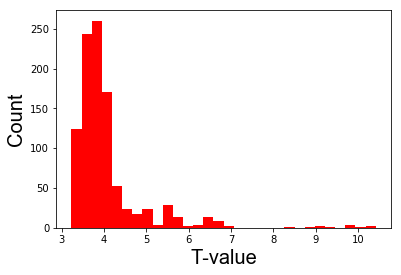

In [34]:
num_random = 1000
rand_corr = np.zeros(num_random)
rand_t_val = np.zeros(num_random)
temp0 = np.zeros(n)
temp1 = np.zeros(n)

for i in np.arange(num_random):
    for j in np.arange(n):   
        if np.random.rand(1) < .5:
            temp0[j] = d1[j]
            temp1[j] = d2[j]
        else:
            temp0[j] = d2[j]
            temp1[j] = d1[j]

    rand_corr[i] = np.corrcoef(temp0,temp1)[0,1]
    rand_t_val[i] = (rand_corr[i]*np.sqrt(n-2)) / np.sqrt(1-rand_corr[i]**2)

rand_p_value = 2*(1-(np.sum(t_val>rand_t_val) / num_random))
print('Randomization-based p-value: ', np.round(rand_p_value,8), ' Parametric P-value: ', np.round(p_value,8))

#Plotting the distribution of p-values 
plt.hist(rand_t_val, color='r', alpha=1, bins=30)
plt.xlabel('T-value', **fig_font)
plt.ylabel('Count', **fig_font)
plt.show()

## Part II: Here is a second data set (actually, its another part of the Anscombe data set...but lets pretend like its an entirely new data set)

In [35]:
d1 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
d2 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89])

## Break the first rule of data analysis, and BEFORE you plot the data, compute the mean and std of these two arrays
* What do you notice when you compare them to the mean and std of the arrays in the first part of the exercises?

In [23]:
#Calculate mean, std for the data 1
mean_data_1 = np.mean(d1, axis=0)
std_data_1 = np.std(d1, axis=0)
print('mean of data 1: ', mean_data_1, ' std of data 1: ', std_data_1)

#Calculate mean, std for the data 1
mean_data_2 = np.mean(d2, axis=0)
std_data_2 = np.std(d2, axis=0)
print('mean of data 2: ', mean_data_2, ' std of data 2: ', std_data_2)

mean of data 1:  9.0  std of data 1:  3.1622776601683795
mean of data 2:  7.500909090909091  std of data 2:  1.9360806451340837


## Based only on your comparison of the mean and std of the data from Part I and Part II, what is your prediction about the effects of randomization testing on this new data set? 
* Will the randomization based p-value be similar to the standard p-value as it was in the example above?

## Ok - now plot the data

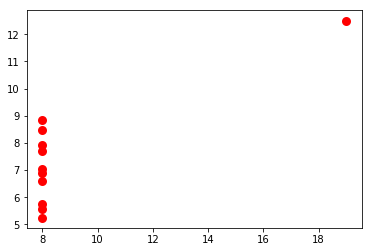

In [24]:
plt.scatter(d1,d2,color='r',marker='o',linewidths=3)
plt.show()

## Based on this, what do you think is going to happen when we compare the output from a parametric test and a radomization test?
* Remember that the mean and the std of the data sets in Part I and Part II are identical...
* Compute correlation coef, and do randomization testing

In [25]:
#Calculate correlation coef
corr = np.corrcoef(d1,d2)[0,1]
print('correlation coef: ', corr)

#Compute t-value and p-value associated with correlation coef
n = len(d1)
t_val = (corr*np.sqrt(n-2)) / np.sqrt(1-corr**2)
p_value = 2*(1-stats.t.cdf(t_val, n-1))
print('t value is: ', t_val, 'p value is: ', p_value)

correlation coef:  0.8165214368885028
t value is:  4.243028188591634 p value is:  0.0017082247651687421


## Compare the correlation coeffecients to those from Part I.
* So far, everything is pretty much the same between the data sets (same mean/std/corr coef)
* So should randomization testing yield about the same results? Try it...

Randomization-based p-value:  0.026  Parametric P-value:  0.00170822


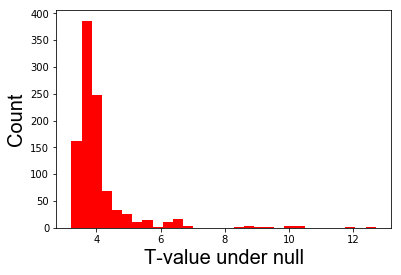

In [29]:
num_random = 1000
rand_corr = np.zeros(num_random)
rand_t_val = np.zeros(num_random)
temp0 = np.zeros(n)
temp1 = np.zeros(n)

for i in np.arange(num_random):
    for j in np.arange(n):
        if np.random.rand(1)<.5:
            temp0[j]=d1[j]
            temp1[j]=d2[j]
        else:
            temp0[j]=d2[j]
            temp1[j]=d1[j]

    rand_corr[i] = np.corrcoef(temp0, temp1)[0,1]
    rand_t_val[i] = (rand_corr[i]*np.sqrt(n-2))/np.sqrt(1-rand_corr[i]**2)

rand_p_val = 2*(1-(np.sum(t_val>rand_t_val)/num_random))
print('Randomization-based p-value: ', np.round(rand_p_value,8), ' Parametric P-value: ', np.round(p_value,8))


# plotting the distribution of p-values that we observe under the null
plt.hist(rand_t_val, color='r', alpha=1, bins=30)
plt.xlabel('T-value under null', **fig_font)
plt.ylabel('Count', **fig_font)
plt.show()

## Part III: Load in the second EEG data set from last week (eeg_data01.npz). 
* Pull out the data, sr, and tx arrays

In [49]:
# load the data...
eeg = np.load('eeg_data01.npz')

# get the different arrays like this...kind of like a structure in matlab. 
eeg['data']
eeg['sr']
eeg['tx']

# and can query the attributes of the data like this...which will tell us that there 1600 trials and 4102 timepoints per trial sampled
# at 1024Hz
print('Shape of the big eeg data set: ', eeg['data'].shape)
print('Sample rate: ', eeg['sr'])

# and if you want to save some typing, especially because we only have a few variables, you reassign the different arrays like this
data = eeg['data']
sr = eeg['sr']
tx = eeg['tx']

Shape of the big eeg data set:  (1600, 4102)
Sample rate:  1024


## Below is a vector that labels each trial as coming from experimental conditions 1,2,3,4

In [50]:
N = data.shape[0]
num_samp_cond = int(N/4)
cond = np.hstack((np.ones(num_samp_cond), np.ones(num_samp_cond)*2, np.ones(num_samp_cond)*3, np.ones(num_samp_cond)*4))

## Now avgerage the data from condition 2, avg the data from condition 3, and plot against the time axis (tx) - we're going to ignore conditions 1 and 4

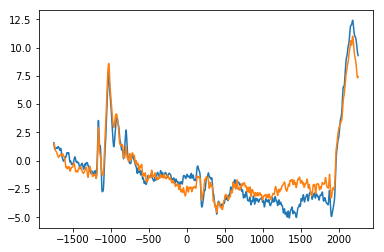

(4102,)

In [51]:
mean_cond2 = np.mean(data[cond==2],axis=0)
mean_cond3 = np.mean(data[cond==3],axis=0)

plt.plot(tx, mean_cond2)
plt.plot(tx,mean_cond3)
plt.show()
mean_cond2.shape

## Next do a t-test for related samples comparing the responses in conditions 2 and 3 at each point in time. Note - you can do this all in one line of code!

In [52]:
t_test = stats.ttest_rel(data[cond==2,:],data[cond==3,:],axis=0)

# print out t and p-values
print('t-value: ', np.round(t_test.statistic,2), ' p-value: ', np.round(t_test.pvalue,8))

t-value:  [0.19 0.1  0.   ... 2.73 2.68 2.64]  p-value:  [0.85198736 0.92376188 0.99879741 ... 0.00668677 0.00763099 0.00856197]


## now plot the averages in one plot, and then right below that make another plot with the t-values. Keep in mind that with this many degrees of freedom, a t-value of approx 1.9 is significant at the magic 0.05 level (or 1.68 one-tailed). So put some horizontal lines on the plot at 1.9 and -1.9. You'll see some pretty impressive t-values in the data!

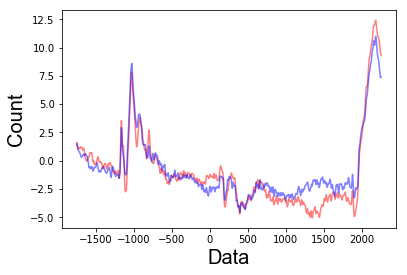

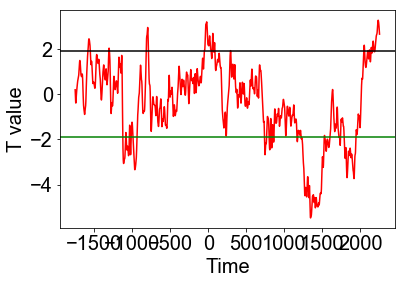

In [54]:
plt.plot(tx, mean_cond2, color='r', alpha=.5)
plt.plot(tx, mean_cond3, color='b', alpha=.5)
plt.xlabel('Data', **fig_font)
plt.ylabel('Count', **fig_font)

plt.show()

h = plt.plot(tx, t_test.statistic, color='r', alpha=1)
plt.xticks(**fig_font)
plt.yticks(**fig_font)
plt.xlabel('Time', **fig_font)
plt.ylabel('T value', **fig_font)
plt.axhline(y=1.9, color='k')
plt.axhline(y=-1.9, color='g')

axis = plt.gca()
x_limits = axis.get_xlim()
y_limits = axis.get_ylim()

plt.show()

## You should see that there is a significant difference at many timepoints...Now figure out how robust those effects are by applying bootstrapping 
* To do this, you might first create two 800 x 4102 matrices, one with data from all trials of condition 2, and one with data from all trials of condition 3
* Then resample 800 trials, with replacement, from each data matrix and then do the t-test. 
* try generating a set of 800 values with repeating numbers that you can use for a row index into the data matrices
* repeat and then compute CIs of the t-value
* how often do the CIs for the t-value overlap with 0???
* note - this can take a while, so start with 50 bootstraps and then increase as compute time allows

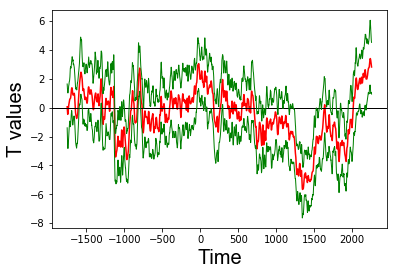

In [56]:
cond2 = data[cond==2]
cond3 = data[cond==3]
obs_corr = np.corrcoef(cond2,cond3)[0,1]

N=len(cond2)

num_bootstraps = 50
corr = np.zeros(num_bootstraps)
boot_t_val = np.zeros((num_bootstraps,cond2.shape[1])) #shape of t_val! 50 times by 4102 t values

for i in np.arange(num_bootstraps):
    # with replacement generate a sample number from 0:N exclusive and do that N times
    index = np.random.randint(N, size=N)

    # use that to pull data from each of our arrays
    tmp1 = cond2[index]
    tmp2 = cond3[index]
    
    # compute correlation
    corr[i] = np.corrcoef(tmp1,tmp2)[0,1]
    tmp_t_val = stats.ttest_rel(tmp1,tmp2)
    boot_t_val[i] = tmp_t_val.statistic
    
#     tmp_t_val = np.mean(tmp1-tmp2, axis=0) / (np.std(tmp1-tmp2, axis=0) / np.sqrt(N-1))
#    boot_t_val[i] = tmp_t_val
#     boot_t_val[i] = (corr[i]*np.sqrt(N-2))/np.sqrt(1-corr[i]**2)
    
# then compute 95% CIs based on percentiles 
CIs = np.percentile(boot_t_val, [2.5, 97.5], axis=0)

# don't histogram; just plot!
plt.plot(tx, np.mean(boot_t_val, axis=0), color='r', alpha=1)
plt.axhline(0, color='k', linewidth=1)
plt.plot(tx, CIs[0,], color='g', linewidth=1)
plt.plot(tx, CIs[1,], color='g', linewidth=1)
plt.xlabel('Time', **fig_font)
plt.ylabel('T values', **fig_font)
plt.show()



## How do things compare?